In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [17]:
df = pd.read_csv("unhcr_Syria_refugeesCLEAN.csv", na_values=["*"])
df.head(10)

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
0,2011,United Arab Emirates,Syrian Arab Rep.,37.0,6.0,NaN,NaN,NaN,NaN,NaN,43.0
1,2011,Armenia,Syrian Arab Rep.,6.0,2.0,NaN,NaN,NaN,NaN,NaN,8.0
2,2011,Australia,Syrian Arab Rep.,84.0,66.0,NaN,NaN,NaN,NaN,NaN,150.0
3,2011,Austria,Syrian Arab Rep.,903.0,456.0,NaN,NaN,NaN,NaN,NaN,1359.0
4,2011,Azerbaijan,Syrian Arab Rep.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2011,Belgium,Syrian Arab Rep.,312.0,666.0,NaN,NaN,NaN,NaN,NaN,978.0
6,2011,Benin,Syrian Arab Rep.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2011,Bulgaria,Syrian Arab Rep.,98.0,70.0,NaN,NaN,NaN,NaN,NaN,168.0
8,2011,Bahrain,Syrian Arab Rep.,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0
9,2011,Bosnia and Herzegovina,Syrian Arab Rep.,1.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0


In [3]:
df.shape

(806, 11)

In [18]:
# LOOK AT HOW MANY ROWS EACH COUNTRY HAS
# FIGURE OUT HOW MANY IN EACH COUNTRY
# ANYWAY TO DETERMINE HOW MANY ARE CURRENTLY STILL THERE? SUBTRACT 'RETURNED' COLUMN VALUES???

# df.groupby(['pclass','gender'])['survived'].count()
# df.groupby(['Year', 'Host_Country'])['Total_Population'].count()
df.groupby(['Year'])['Total_Population'].sum()

Year
2011      279497.0
2012     3068018.0
2013     9340330.0
2014    11606526.0
2015    11690998.0
2016    12643092.0
2017    13288332.0
Name: Total_Population, dtype: float64

In [32]:
# SORT BY RETURNED TO SEE HOW IT AFFECTS TOTAL
# df.sort_values(by='Returned_IDPs', ascending=False)
# df[df['Host_Country'].str.contains('Syrian')]

In [19]:
df.Total_Population.isnull().value_counts()
df.dtypes

Year                                     int64
Host_Country                            object
Origin                                  object
Refugees                               float64
Asylum-seekers                         float64
Returned refugees                      float64
Internally_Displaced_Persons_(IDPs)    float64
Returned_IDPs                          float64
Stateless persons                      float64
Others_of_concern                      float64
Total_Population                       float64
dtype: object

In [20]:
# df[df.Host_Country == 'Algeria']
us_df = df[df.Host_Country == 'United States of America']
us_df

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
72,2011,United States of America,Syrian Arab Rep.,373.0,112.0,NaN,NaN,NaN,NaN,NaN,485.0
168,2012,United States of America,Syrian Arab Rep.,1425.0,367.0,NaN,NaN,NaN,NaN,NaN,1792.0
282,2013,United States of America,Syrian Arab Rep.,3802.0,1378.0,NaN,NaN,NaN,NaN,NaN,5180.0
406,2014,United States of America,Syrian Arab Rep.,4750.0,2302.0,NaN,NaN,NaN,NaN,NaN,7052.0
535,2015,United States of America,Syrian Arab Rep.,5651.0,3118.0,NaN,NaN,NaN,NaN,NaN,8769.0
665,2016,United States of America,Syrian Arab Rep.,6444.0,3364.0,NaN,NaN,NaN,NaN,NaN,9808.0
800,2017,United States of America,Syrian Arab Rep.,7282.0,3358.0,NaN,NaN,NaN,NaN,NaN,10640.0


In [54]:
us_df.Total_Population.sum()

43726.0

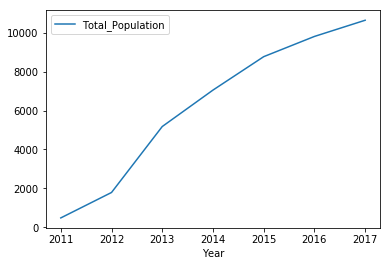

In [56]:
us_df.plot(x='Year', y='Total_Population')

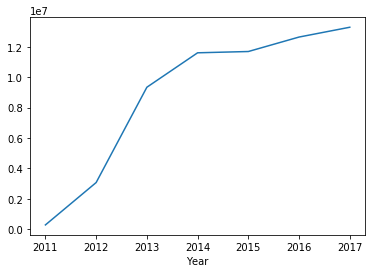

In [30]:
# df.groupby('Host_Country').Total_Population.sum()
df.groupby('Year').Total_Population.sum().plot()

In [31]:
last_year = df[df.Year == 2017]
top_ten = last_year.sort_values(by='Total_Population', ascending=False).head(10)
top_ten

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
790,2017,Syrian Arab Rep.,Syrian Arab Rep.,NaN,NaN,77212.0,6150005.0,597152.0,NaN,NaN,6824369.0
796,2017,Turkey,Syrian Arab Rep.,3424237.0,163.0,NaN,NaN,NaN,NaN,NaN,3424400.0
742,2017,Lebanon,Syrian Arab Rep.,992127.0,8.0,NaN,NaN,NaN,NaN,2248.0,994383.0
734,2017,Jordan,Syrian Arab Rep.,653031.0,NaN,NaN,NaN,NaN,NaN,NaN,653031.0
704,2017,Germany,Syrian Arab Rep.,496674.0,70833.0,NaN,NaN,NaN,NaN,NaN,567507.0
729,2017,Iraq,Syrian Arab Rep.,247057.0,NaN,NaN,NaN,NaN,NaN,NaN,247057.0
710,2017,Egypt,Syrian Arab Rep.,126688.0,NaN,NaN,NaN,NaN,NaN,NaN,126688.0
789,2017,Sweden,Syrian Arab Rep.,103614.0,3531.0,NaN,NaN,NaN,NaN,NaN,107145.0
678,2017,Austria,Syrian Arab Rep.,43888.0,3937.0,NaN,NaN,NaN,NaN,NaN,47825.0
765,2017,Netherlands,Syrian Arab Rep.,30851.0,668.0,NaN,NaN,NaN,NaN,NaN,31519.0


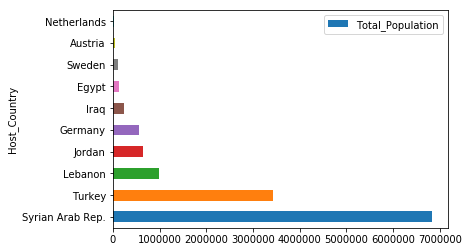

In [32]:
top_ten.plot(kind='barh', x='Host_Country', y='Total_Population')

In [83]:
df2 = pd.read_csv("GDP_CLEANED.csv", encoding="latin-1")

In [85]:
df2.head()

,Unnamed: 0,code,rank,blank,country,gdp,blank2,blank3
0,USA,1,NaN,United States,"19,390,604",NaN,NaN,NaN
1,CHN,2,NaN,China,"12,237,700",NaN,NaN,NaN
2,JPN,3,NaN,Japan,"4,872,137",NaN,NaN,NaN
3,DEU,4,NaN,Germany,"3,677,439",NaN,NaN,NaN
4,GBR,5,NaN,United Kingdom,"2,622,434",NaN,NaN,NaN


In [92]:
# everywhere.drop(columns = [])
# df2.drop(columns = ['rank', 'gdp', 'blank2', 'blank3'], inplace=True)
df2.head()

,Unnamed: 0,code,blank,country
0,USA,1,United States,"19,390,604"
1,CHN,2,China,"12,237,700"
2,JPN,3,Japan,"4,872,137"
3,DEU,4,Germany,"3,677,439"
4,GBR,5,United Kingdom,"2,622,434"


In [98]:
df2.rename(index=str, columns={"Unnamed: 0": "country_code"}, inplace=True)

In [97]:
df2.rename(index=int, columns={"code": "rank"}, inplace=True)

In [101]:
df2.rename(index=float, columns={"country": "gdp"}, inplace=True)
df2.head()

,country_code,rank,blank,gdp
0.0,USA,1,United States,"19,390,604"
1.0,CHN,2,China,"12,237,700"
2.0,JPN,3,Japan,"4,872,137"
3.0,DEU,4,Germany,"3,677,439"
4.0,GBR,5,United Kingdom,"2,622,434"


In [109]:
# df2['gdp'] = df2.gdp.str.replace(",", "")
df2.head(10)

,country_code,rank,blank,gdp
0.0,USA,1,United States,19390604.0
1.0,CHN,2,China,12237700.0
2.0,JPN,3,Japan,4872137.0
3.0,DEU,4,Germany,3677439.0
4.0,GBR,5,United Kingdom,2622434.0
5.0,IND,6,India,2597491.0
6.0,FRA,7,France,2582501.0
7.0,BRA,8,Brazil,2055506.0
8.0,ITA,9,Italy,1934798.0
9.0,CAN,10,Canada,1653043.0


In [106]:
df2['gdp'] = df2.gdp.astype(float)

In [111]:
df2.rename(index=float, columns={"blank": "country"}, inplace=True)

In [113]:
df2.to_csv("WorldBank_GDP.csv", index=False)

In [6]:
df2 = pd.read_csv("WorldBank_GDP.csv")

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
country_code    200 non-null object
rank            200 non-null int64
country         200 non-null object
gdp             200 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ KB


In [14]:
top_twenty = df2.sort_values(by='gdp', ascending=False).head(20)
top_twenty

,country_code,rank,country,gdp
0,USA,1,United States,19390604.0
1,CHN,2,China,12237700.0
2,JPN,3,Japan,4872137.0
3,DEU,4,Germany,3677439.0
4,GBR,5,United Kingdom,2622434.0
5,IND,6,India,2597491.0
6,FRA,7,France,2582501.0
7,BRA,8,Brazil,2055506.0
8,ITA,9,Italy,1934798.0
9,CAN,10,Canada,1653043.0


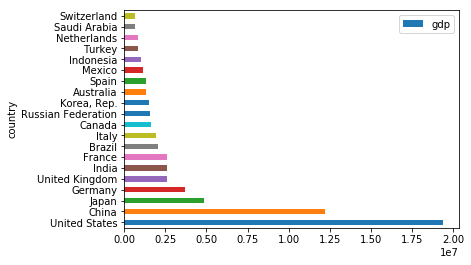

In [15]:
ax = top_twenty.plot(kind='barh', x='country', y='gdp')

In [ ]:
# wall_punchers = df[df.Narrative_1.str.contains("PUNCH.*WALL", na=False)]
# wall_punchers['Sex'].value_counts().sort_values(ascending=True).plot(kind="barh")